### Read Data

In [326]:
import pandas as pd

col_list = ['news', 'sentiment']
df = pd.read_csv('data/sentiment_updated_3.csv', usecols=col_list, encoding='utf8')
df

,news,sentiment
0,ended trading day weak note key index struggli...,negative
1,broadly higher early trade today yesterday sel...,negative
2,bucked regional trend close higher today key i...,positive
3,closed lower today amid mixed regional peers p...,negative
4,opened lower morning bucking regional trend ma...,negative
...,...,...
328,economy expected grow year expand amid recover...,positive
329,turned positive Tuesday broad recovery rally t...,positive
330,Based corporate announcements news flow Tuesda...,negative
331,extended gains rebound barometer index opening...,positive


### Generate N-Grams

In [327]:
from collections import defaultdict
from nltk import ngrams

ngrams_counts = {
    'positive': {n: 0 for n in range(1,4)},
    'negative': {n: 0 for n in range(1,4)},
}

def count_ngrams(sentiment, n, gram_dict):
  for news in df[df.sentiment==sentiment].news:
    grams = ngrams(news.split(), n)

    # grams generator might be empty
    try:
      for gram in grams:
        gram = ' '.join(gram)
        gram_dict[gram] += 1
        ngrams_counts[sentiment][n] += 1
    except:
      pass


def generate_top5_counts(gram_dict):
  # Sort ngram counts by descending order
  df = pd.DataFrame(sorted(gram_dict.items(), key=lambda x:x[1], reverse=True))

  # return top 5 counts only
  return (df[0][:5], df[1][:5])


sentiment_n_gram_dict = {
    'positive': {i: defaultdict(int) for i in range(1,4)},
    'negative': {i: defaultdict(int) for i in range(1,4)},
}

sentiment_n_top5_counts = {
    'positive': {},
    'negative': {},
}

for sentiment, n_gram_dict in sentiment_n_gram_dict.items():
  for n, gram_dict in n_gram_dict.items():
    count_ngrams(sentiment, n, gram_dict)
    sentiment_n_top5_counts[sentiment][n] = generate_top5_counts(gram_dict)

### Examples of N-Grams with Positive Sentiment

In [328]:
print(list(sentiment_n_gram_dict['positive'][1])[:5])
print(list(sentiment_n_gram_dict['positive'][2])[:5])
print(list(sentiment_n_gram_dict['positive'][3])[:5])

['bucked', 'regional', 'trend', 'close', 'higher']
['bucked regional', 'regional trend', 'trend close', 'close higher', 'higher today']
['bucked regional trend', 'regional trend close', 'trend close higher', 'close higher today', 'higher today key']


### Examples of N-Grams with Negative Sentiment

In [329]:
print(list(sentiment_n_gram_dict['negative'][1])[:5])
print(list(sentiment_n_gram_dict['negative'][2])[:5])
print(list(sentiment_n_gram_dict['negative'][3])[:5])

['ended', 'trading', 'day', 'weak', 'note']
['ended trading', 'trading day', 'day weak', 'weak note', 'note key']
['ended trading day', 'trading day weak', 'day weak note', 'weak note key', 'note key index']


### Visualization

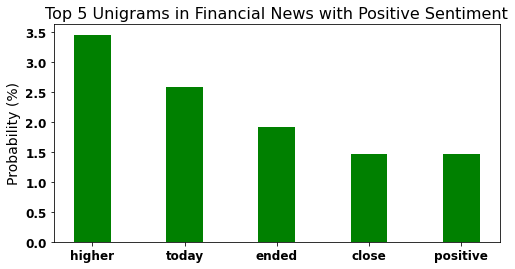

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

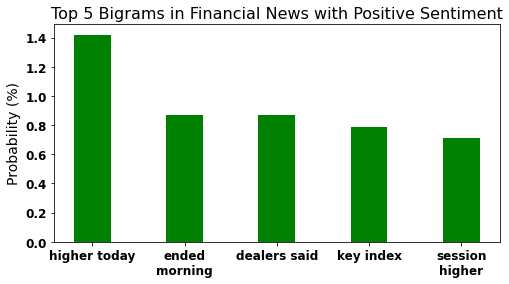

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

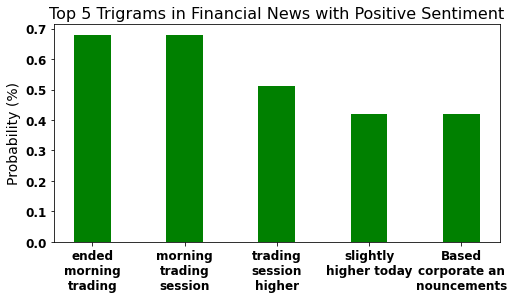

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

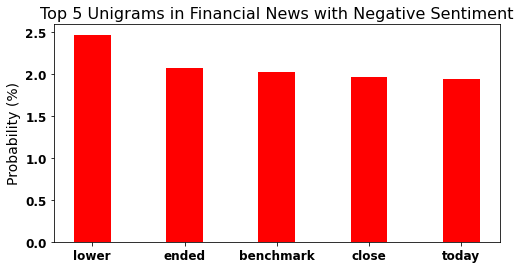

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

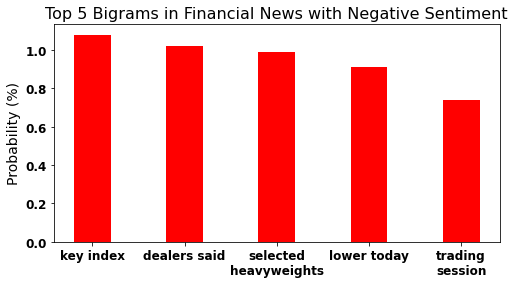

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

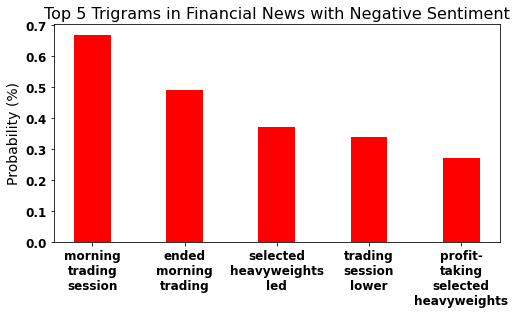

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [330]:
import matplotlib.pyplot as plt
import textwrap
from google.colab import files

plt.rcParams.update({
    'axes.titlesize' : 16,
    'axes.labelsize' : 14,
    'font.family': 'sans-serif',
    'font.size': 12,
})

ngram_names = {
    1: 'unigrams',
    2: 'bigrams',
    3: 'trigrams',
}

def visualize(news, prob, title, color, fname):
  plt.figure(1, figsize=(8, 4))
  
  news = [textwrap.fill(n, 12) for n in news]
  plt.bar(news, prob, color=color, width = 0.4)

  plt.ylabel('Probability (%)')
  plt.title(title)
  plt.savefig(f'{fname}.svg')
  plt.show()
  files.download(f'{fname}.svg')


for sentiment, n_top5_counts in sentiment_n_top5_counts.items():
  for n, top5_counts in n_top5_counts.items():
    (top5_news, top5_count) = top5_counts
    prob = round((top5_count/ngrams_counts[sentiment][n])*100, 2)
    ngram_name = ngram_names[n].capitalize()
    color = 'green' if sentiment == 'positive' else 'red'

    visualize(top5_news, prob, f'Top 5 {ngram_name} in Financial News with {sentiment.capitalize()} Sentiment', color, f'{sentiment}_{ngram_names[n]}')